# Limpieza y Normalizacion de Datos

In [ ]:
import pandas as pd
import glob

In [ ]:
# Obtener lista de archivos CSV
files = glob.glob("/content/data/raw/*.csv")

df_list = []

for file in files:
  df = pd.read_csv(file, sep=";", encoding="latin-1")

  # Normalizar nombres de columnas

  df.columns = (
      df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("*", "", regex=False)
  )

  # Define las columnas esperadas
  expected_cols = ["fecha", "grupo", "producto", "codigo_cpc_ac", "mercado", "precio_promedio_por_kilogramo"]

  # Revisa si las columnas esperadas estan en el dataframe
  for col in expected_cols:
      if col not in df.columns:
          df[col] = None
  df = df[expected_cols]

  # Limpieza de campos de texto
  # Strip para quitar espacios, tabs o saltos
  cols_str = ["grupo", "producto", "mercado"]
  for col in cols_str:
      if col in df.columns: # Added check for column existence
          df[col] = df[col].astype(str).str.strip().str.upper()

  # Normalización de fecha
  # Convertir formato "ene-24" a datetime
  if "fecha" in df.columns: # Added check for column existence
    df["fecha"] = pd.to_datetime(df["fecha"], format="%b-%y", errors="coerce")


  # Limpieza y normalización de precios

  # Quitar puntos de miles y convertir a float
  if "precio_promedio_por_kilogramo" in df.columns: # Added check for column existence
      df["precio_promedio_por_kilogramo"] = (
          df["precio_promedio_por_kilogramo"]
          .astype(str)
          .str.replace(".", "", regex=False)
          .str.replace(",", ".", regex=False)
          .str.replace(" ", "")
      )

      df["precio_promedio_por_kilogramo"] = pd.to_numeric(
          df["precio_promedio_por_kilogramo"], errors="coerce"
      )

  # Eliminar duplicados y filas no válidas
  df.drop_duplicates(inplace=True)
  df_clean = df.dropna(subset=["fecha", "precio_promedio_por_kilogramo"])

  # Ordenar y exportar dataset limpio
  df_clean = df_clean.sort_values(by=["fecha", "producto", "mercado"])

  df_list.append(df_clean) # Append df_clean instead of df

# Concatenar todos los dataframes
df_full = pd.concat(df_list, ignore_index=True)

# Eliminar duplicados and nulos
df_full.drop_duplicates(inplace=True)
df_full = df_full.dropna(subset=["fecha", "precio_promedio_por_kilogramo"])

# Orden final
df_full = df_full.sort_values(by=["fecha", "producto", "mercado"])

# Exportar dataset maestro
df_full.to_csv("/content/data/processed/sipsa_master.csv", index=False)

print("Dataset consolidado generado en data/processed/sipsa_master.csv")

✅ Dataset consolidado generado en data/processed/sipsa_master.csv


# EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()


In [ ]:
df = pd.read_csv("data/processed/sipsa_master.csv", parse_dates=["fecha"])
df.head()

,fecha,grupo,producto,codigo_cpc_ac,mercado,precio_promedio_por_kilogramo
0,2022-02-01,PROCESADOS,ACEITE DE PALMA,NaN,"ARMENIA, MERCAR",7204.0
1,2022-02-01,PROCESADOS,ACEITE DE PALMA,NaN,"MONTERÍA, MERCADO DEL SUR",7234.0
2,2022-02-01,PROCESADOS,ACEITE GIRASOL,NaN,"BARRANQUILLA, BARRANQUILLITA",15163.0
3,2022-02-01,PROCESADOS,ACEITE GIRASOL,NaN,"BARRANQUILLA, GRANABASTOS",15985.0
4,2022-02-01,PROCESADOS,ACEITE GIRASOL,NaN,"CARTAGENA, BAZURTO",12299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71698 entries, 0 to 71697
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   fecha                          71698 non-null  datetime64[ns]
 1   grupo                          71698 non-null  object        
 2   producto                       71698 non-null  object        
 3   codigo_cpc_ac                  0 non-null      float64       
 4   mercado                        71698 non-null  object        
 5   precio_promedio_por_kilogramo  71698 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
df.isna().sum()

,0
fecha,0
grupo,0
producto,0
codigo_cpc_ac,71698
mercado,0
precio_promedio_por_kilogramo,0


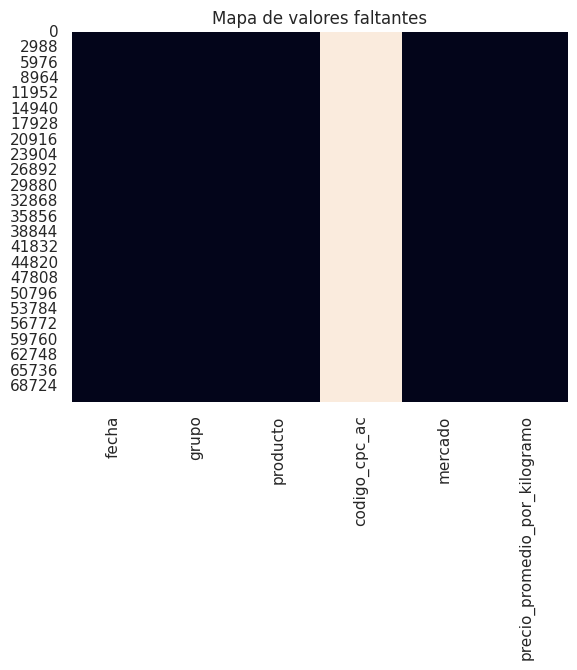

In [ ]:
# Visualización
sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include="all")

,fecha,grupo,producto,codigo_cpc_ac,mercado,precio_promedio_por_kilogramo
count,71698,71698,71698,0.0,71698,71698.000000
unique,NaN,8,352,NaN,81,NaN
top,NaN,FRUTAS,TOMATE DE ÁRBOL,NaN,"MEDELLÍN, CENTRAL MAYORISTA DE ANTIOQUIA",NaN
freq,NaN,17660,743,NaN,3315,NaN
mean,2022-12-20 03:37:04.229406720,NaN,NaN,NaN,NaN,7507.244372
min,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,10.000000
25%,2022-06-01 00:00:00,NaN,NaN,NaN,NaN,1698.000000
50%,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,3572.000000
75%,2023-07-01 00:00:00,NaN,NaN,NaN,NaN,8927.000000
max,2023-11-01 00:00:00,NaN,NaN,NaN,NaN,180903.000000


## Analisis Univariado

### Distribucion de precios

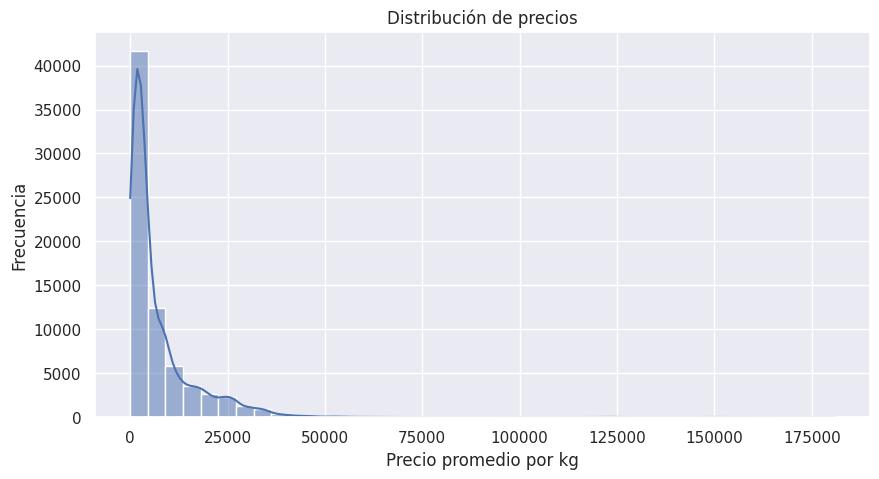

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["precio_promedio_por_kilogramo"], bins=40, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio promedio por kg")
plt.ylabel("Frecuencia")
plt.show()


### Precios por grupo

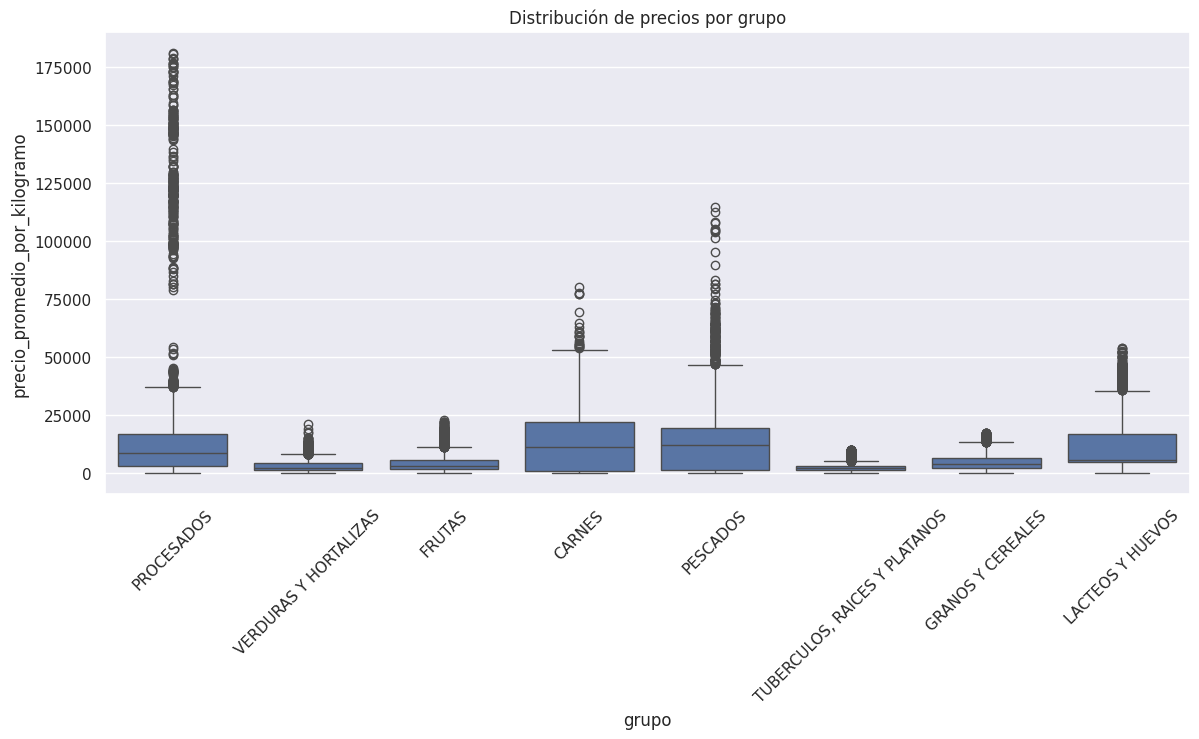

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x="grupo", y="precio_promedio_por_kilogramo", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de precios por grupo")
plt.show()


## Analisis Temporal

### Tendencia general del precio promedio

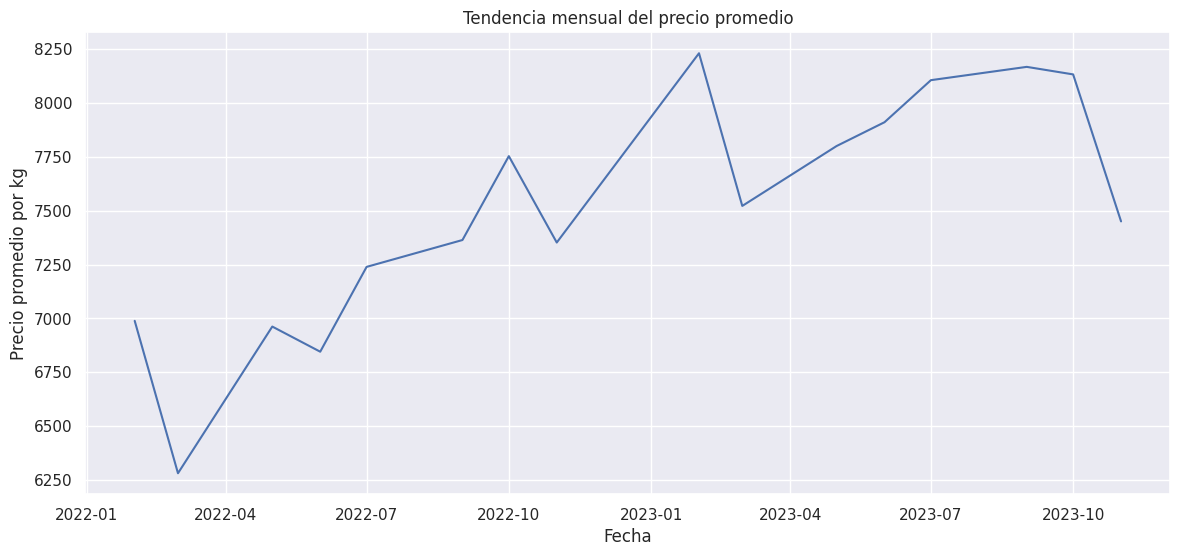

In [ ]:
trend = df.groupby("fecha")["precio_promedio_por_kilogramo"].mean()

plt.figure(figsize=(14,6))
plt.plot(trend.index, trend.values)
plt.title("Tendencia mensual del precio promedio")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio por kg")
plt.grid(True)
plt.show()


### Tendencia por producto específico

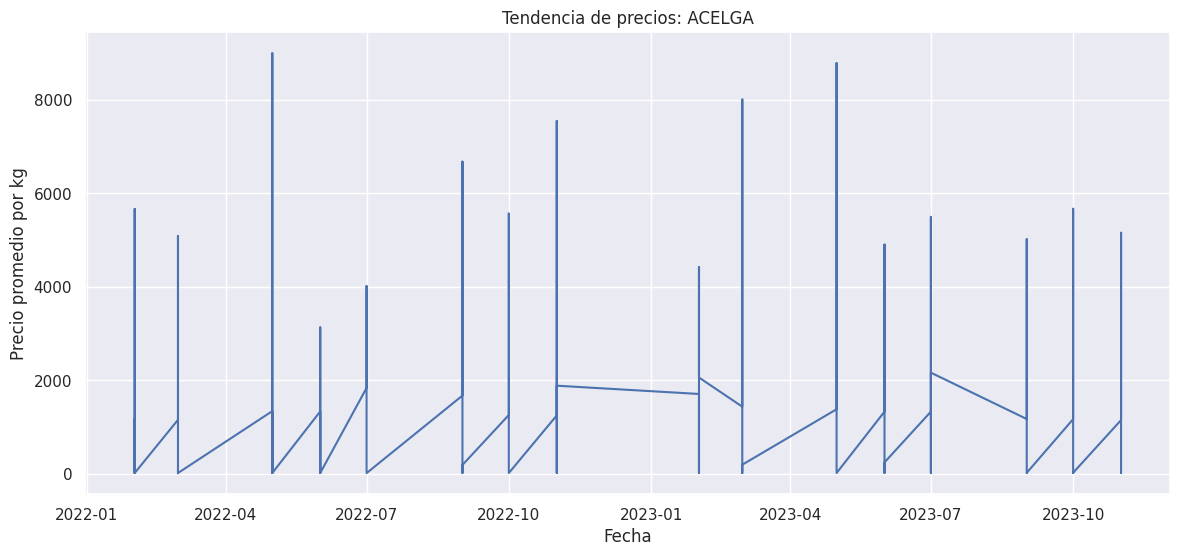

In [ ]:
producto = "ACELGA"  # puedes cambiarlo
temp = df[df["producto"] == producto]

plt.figure(figsize=(14,6))
plt.plot(temp["fecha"], temp["precio_promedio_por_kilogramo"])
plt.title(f"Tendencia de precios: {producto}")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio por kg")
plt.grid(True)
plt.show()

## Comparación entre mercados

### Precios por mercado

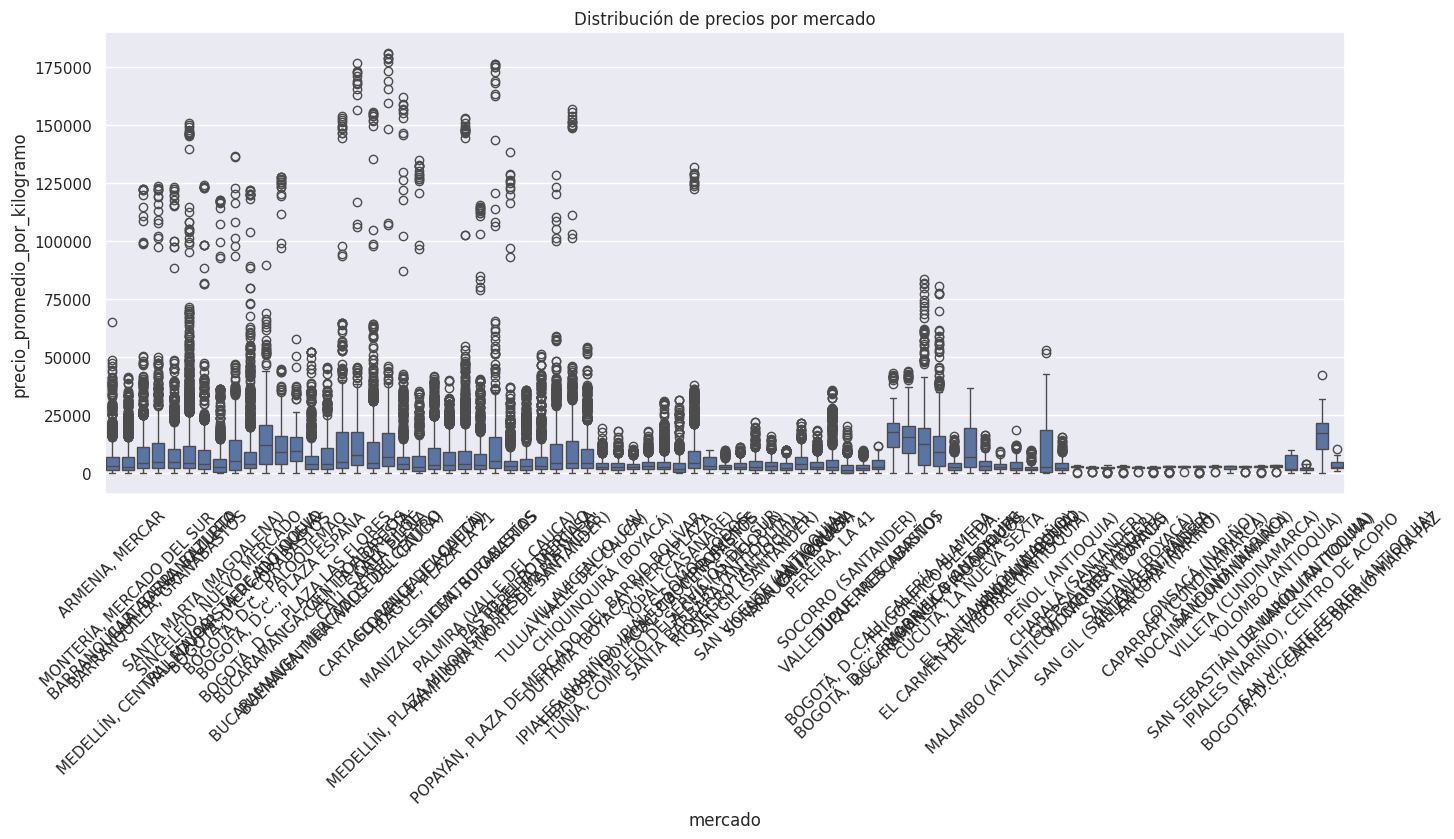

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="mercado", y="precio_promedio_por_kilogramo")
plt.xticks(rotation=45)
plt.title("Distribución de precios por mercado")
plt.show()

### Promedio por mercado

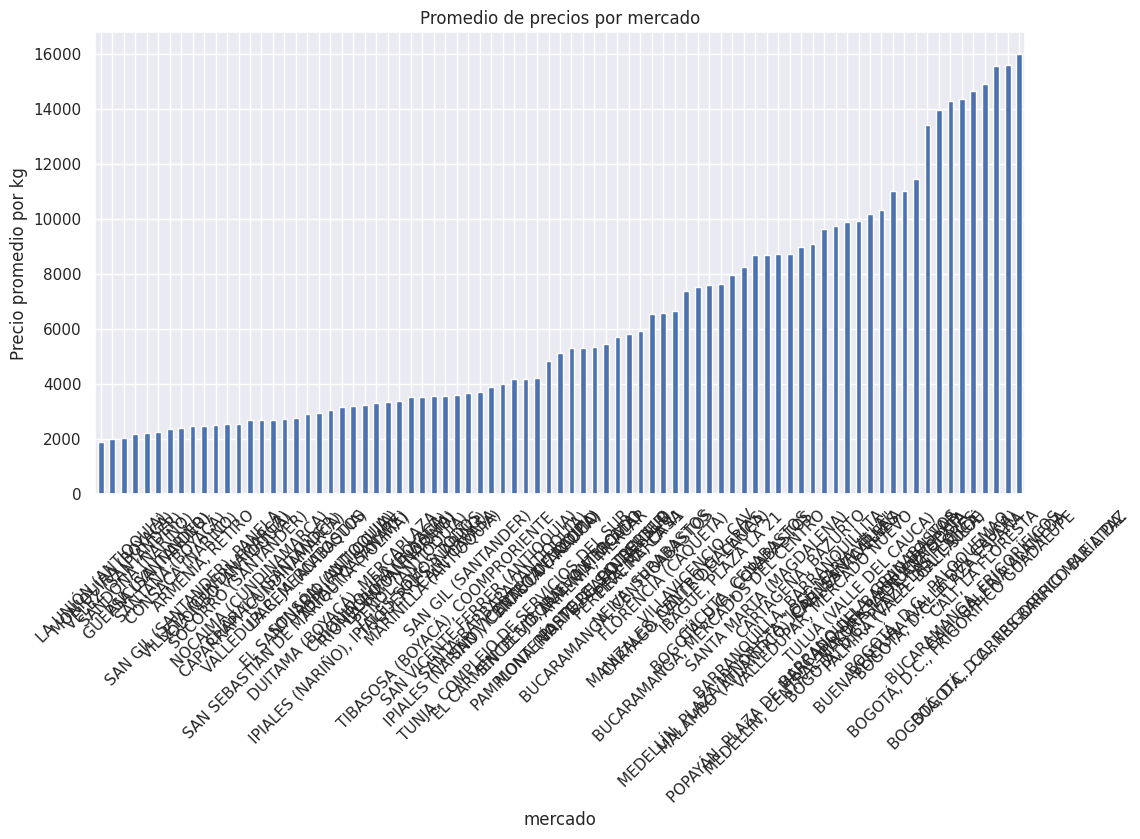

In [ ]:
market_avg = df.groupby("mercado")["precio_promedio_por_kilogramo"].mean().sort_values()

plt.figure(figsize=(12,6))
market_avg.plot(kind="bar")
plt.title("Promedio de precios por mercado")
plt.ylabel("Precio promedio por kg")
plt.xticks(rotation=45)
plt.show()

## Análisis por producto

### Productos más caros (top 10)

In [ ]:
top_expensive = (
    df.groupby("producto")["precio_promedio_por_kilogramo"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_expensive

,precio_promedio_por_kilogramo
producto,
CAFÉ INSTANTÁNEO,115342.660661
LANGOSTINO U12,64857.935484
"CORVINA, FILETE CONGELADO NACIONAL",44768.269231
LANGOSTINO 16-20,40357.080000
"SALMÓN, FILETE CONGELADO",35979.701493
"MERLUZA, FILETE NACIONAL",35290.026316
SOPA DE POLLO (CAJA),34602.705882
LECHE EN POLVO,34466.031161
LOMITOS DE ATÚN EN LATA,27011.899204


### Productos más baratos (top 10)

In [ ]:
top_cheap = (
    df.groupby("producto")["precio_promedio_por_kilogramo"]
    .mean()
    .sort_values()
    .head(10)
)

top_cheap

,precio_promedio_por_kilogramo
producto,
CAPAZ MAGDALENA FRESCO,180.000000
PAPA TOCARREÑA,1006.714286
MAÍZ AMARILLO CÁSCARA IMPORTADO,1290.000000
RABADILLAS DE POLLO,1346.000000
PAPA R-12 NEGRA,1462.432432
SAL YODADA,1543.036053
CALAMAR MORADO ENTERO,1570.000000
BADEA,1595.818182
BANANO BOCADILLO,1621.825000


## Correlaciones

### Matriz de correlación (productos pivotados)

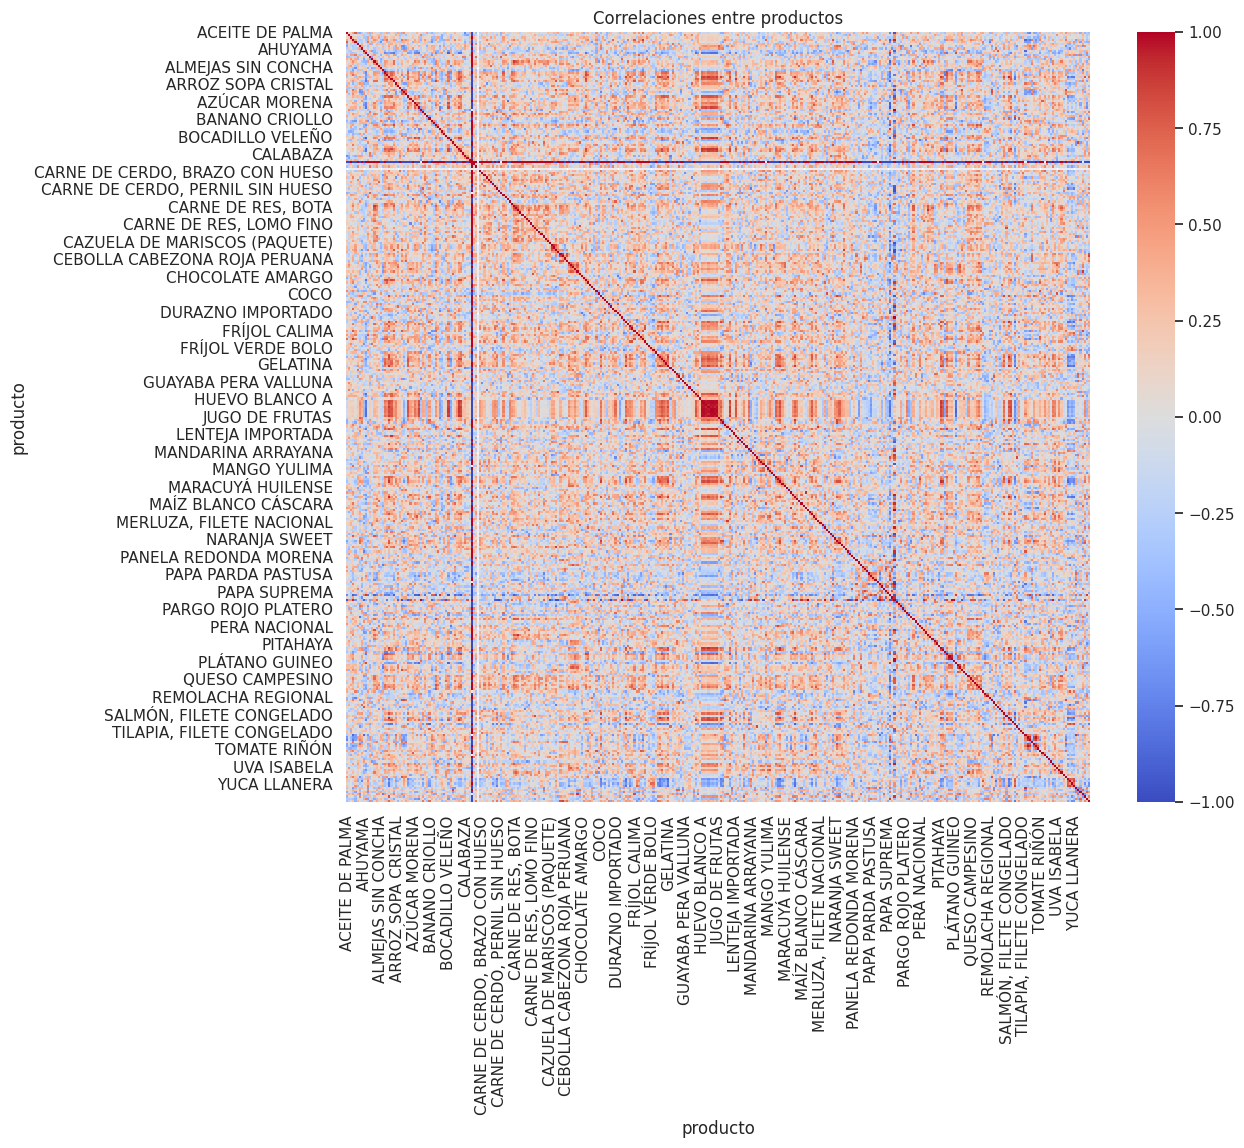

In [ ]:
pivot = df.pivot_table(
    index="fecha",
    columns="producto",
    values="precio_promedio_por_kilogramo"
)

corr = pivot.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlaciones entre productos")
plt.show()

## Conclusiones principales del EDA:

1. La calidad de datos es alta luego de la limpieza.
2. Se observan tendencias crecientes y estacionales en los precios.
3. Hay una variabilidad significativa entre mercados.
4. Los productos muestran perfiles de comportamiento diferenciados.
5. Las correlaciones permiten detectar productos relacionados.

El dataset está listo para:
- generación de métricas
- dashboard
- modelado predictivo